# Generate a CNN Model

In [ ]:
from tensorflow.keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from keras.layers import Conv2D, Input, Dense, Activation, MaxPooling2D, Flatten, AveragePooling2D, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from keras.utils import to_categorical
from tensorflow.keras.datasets.mnist import load_data

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/usr/local/lib/python3.10/dist-packages/keras/api/preprocessing/image/__init__.py)

In [ ]:
inputs = Input((28, 28, 1))
x = Conv2D(filters = 32, kernel_size = (3, 3), strides=(1,1), padding = 'same', activation = 'relu')(inputs)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides=(1,1), padding = 'same', activation = 'relu')(x)
x = MaxPooling2D()(x)

In [ ]:
x = Flatten()(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(10, name = 'OutputLayer', activation = 'softmax')(x)
without_augmented_model = Model(inputs, outputs, name = 'CNN_Not_Augmented')
with_augmented_model = Model(inputs, outputs, name = 'CNN_Augmented')


# Display the Generated Model trained with non augmented Data with the required number of Parameters

In [ ]:
without_augmented_model.summary()

Model: "CNN_Not_Augmented"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_1 (Dense)             (None, 64)                802880    
                                                 

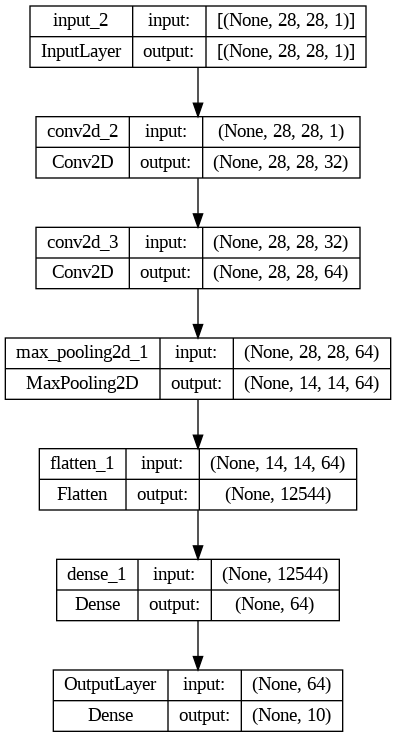

In [ ]:
plot_model(without_augmented_model, to_file='model_plot_non_augmented.png', show_shapes=True, show_layer_names=True)

# Display the Generated Model trained with Augmented Data with the required number of Parameters

In [ ]:
with_augmented_model.summary()

Model: "CNN_Augmented"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_1 (Dense)             (None, 64)                802880    
                                                     

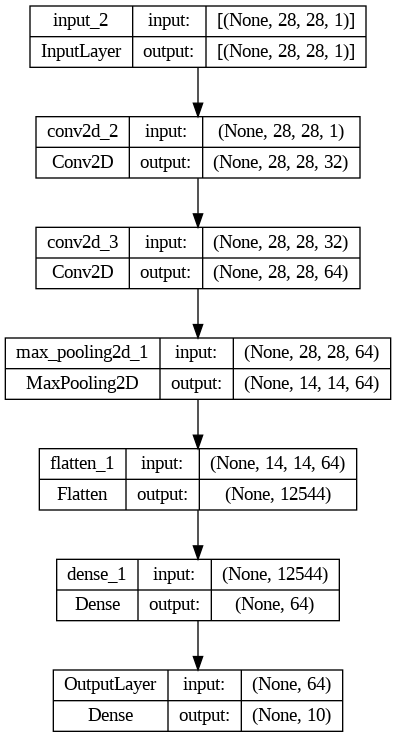

In [ ]:
plot_model(with_augmented_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Load The MNIST Data

In [ ]:
def display_img(img_set, title_set):
  n = len(title_set)
  for i in range(n):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_set[i], cmap = 'gray')
    plt.title(title_set[i])
  plt.show()
  plt.close()

trainX.shape: (60000, 28, 28), trainY.shape: (60000,), testX.shape: (10000, 28, 28), testY.shape: (10000,))


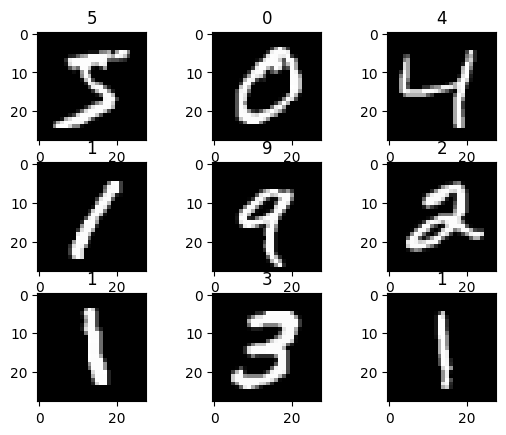

In [ ]:
# Load data
(trainX, trainY), (testX, testY) = load_data()

# Investigate loaded data
print('trainX.shape: {}, trainY.shape: {}, testX.shape: {}, testY.shape: {})'.format(trainX.shape, trainY.shape, testX.shape, testY.shape))

# Dispaly some loaded image data
display_img(trainX[:9], trainY[:9])

In [ ]:
# Turn 2D images into 3D.
trainX = np.expand_dims(trainX, axis = -1)
testX = np.expand_dims(testX, axis = -1)

print('trainX.shape: {}, testX.shape: {})'.format(trainX.shape, testX.shape))

# Turn y into one-hot-encoding
trainY = to_categorical(trainY, num_classes = 10)
testY = to_categorical(testY, num_classes = 10)


# print('trainY.shape: {}, testY.shape: {})'.format(trainY.shape, testY.shape))
print(f'trainy.shpae{trainY.shape} testy.shape{testY.shape}')
print(trainY[:5])

trainX.shape: (60000, 28, 28, 1), testX.shape: (10000, 28, 28, 1))
trainy.shpae(60000, 10) testy.shape(10000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Apply Augmentation on Trainx and TestX

In [ ]:
# Define the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range= 5,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]
)

# Generate augmented data
augmented_data = []
augmented_labels = []
for x_batch, y_batch in datagen.flow(trainX, trainY, batch_size=32, shuffle=False):
    augmented_data.append(x_batch)
    augmented_labels.append(y_batch)
    if len(augmented_data) * 32 >= len(trainX):  # Generate at least one full dataset of augmented data
        break

augmented_data = np.concatenate(augmented_data)
augmented_labels = np.concatenate(augmented_labels)

# Combine the original data with the augmented data
trainX_augmented = np.concatenate((trainX, augmented_data), axis=0)
trainY_augmented = np.concatenate((trainY, augmented_labels), axis=0)

print(f'Augmented trainX shape: {trainX_augmented.shape}, Augmented trainY shape: {trainY_augmented.shape}')

# You can similarly augment the test data if needed, although typically we don't augment test data
# For completeness:
augmented_test_data = []
augmented_test_labels = []
for x_batch, y_batch in datagen.flow(testX, testY, batch_size=32, shuffle=False):
    augmented_test_data.append(x_batch)
    augmented_test_labels.append(y_batch)
    if len(augmented_test_data) * 32 >= len(testX):  # Generate at least one full dataset of augmented data
        break

augmented_test_data = np.concatenate(augmented_test_data)
augmented_test_labels = np.concatenate(augmented_test_labels)

# Combine the original test data with the augmented test data
testX_augmented = np.concatenate((testX, augmented_test_data), axis=0)
testY_augmented = np.concatenate((testY, augmented_test_labels), axis=0)

print(f'Augmented testX shape: {testX_augmented.shape}, Augmented testY shape: {testY_augmented.shape}')


Augmented trainX shape: (120000, 28, 28, 1), Augmented trainY shape: (120000, 10)
Augmented testX shape: (20000, 28, 28, 1), Augmented testY shape: (20000, 10)


# Train The Model Without Augmented Data

In [ ]:
without_augmented_model.compile(loss = 'categorical_crossentropy', metrics = 'accuracy')
without_augmented_history = without_augmented_model.fit(trainX, trainY, batch_size = 32, validation_split = 0.1, epochs = 10)

Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3780 - accuracy: 0.9531 - val_loss: 0.0839 - val_accuracy: 0.9762
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0651 - accuracy: 0.9816 - val_loss: 0.0676 - val_accuracy: 0.9830
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0442 - accuracy: 0.9882 - val_loss: 0.0562 - val_accuracy: 0.9872
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0335 - accuracy: 0.9910 - val_loss: 0.0792 - val_accuracy: 0.9872
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0262 - accuracy: 0.9936 - val_loss: 0.0878 - val_accuracy: 0.9882
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0232 - accuracy: 0.9949 - val_loss: 0.0905 - val_accuracy: 0.9877
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0206 - accuracy: 0.9958 - val_loss: 0.1684 - val_accuracy:

# Evaluate The Models

In [ ]:
performance_dict = without_augmented_history.history
# print(performance_dict.keys())
scores_non_augmented = without_augmented_model.evaluate(testX, testY)
print(f'{without_augmented_model.metrics_names[1]} of model trained on non augmented data on non augmented test {scores_non_augmented[1]*100}')
scores = without_augmented_model.evaluate(testX_augmented, testY_augmented)
print(f'{without_augmented_model.metrics_names[1]} of model trained on non augmented data on augmented test {scores[1]*100}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2044 - accuracy: 0.9845
accuracy of model trained on non augmented data on non augmented test 98.4499990940094
625/625 [==============================] - 2s 2ms/step - loss: 1.3485 - accuracy: 0.8950
accuracy of model trained on non augmented data on augmented test 89.50499892234802


# Train The Model With Augmented Data

In [ ]:
with_augmented_model.compile(loss = 'categorical_crossentropy', metrics = 'accuracy')
with_augmented_history = with_augmented_model.fit(trainX_augmented, trainY_augmented, batch_size = 32, validation_split = 0.1, epochs = 10)

Epoch 1/10
3375/3375 [==============================] - 15s 4ms/step - loss: 0.1326 - accuracy: 0.9666 - val_loss: 0.1423 - val_accuracy: 0.9644
Epoch 2/10
3375/3375 [==============================] - 13s 4ms/step - loss: 0.0825 - accuracy: 0.9795 - val_loss: 0.1653 - val_accuracy: 0.9624
Epoch 3/10
3375/3375 [==============================] - 13s 4ms/step - loss: 0.0704 - accuracy: 0.9833 - val_loss: 0.1353 - val_accuracy: 0.9687
Epoch 4/10
3375/3375 [==============================] - 13s 4ms/step - loss: 0.0660 - accuracy: 0.9857 - val_loss: 0.1747 - val_accuracy: 0.9678
Epoch 5/10
3375/3375 [==============================] - 14s 4ms/step - loss: 0.0657 - accuracy: 0.9874 - val_loss: 0.1527 - val_accuracy: 0.9709
Epoch 6/10
3375/3375 [==============================] - 14s 4ms/step - loss: 0.0584 - accuracy: 0.9892 - val_loss: 0.2206 - val_accuracy: 0.9694
Epoch 7/10
3375/3375 [==============================] - 15s 4ms/step - loss: 0.0617 - accuracy: 0.9900 - val_loss: 0.3803 - val_ac

In [ ]:
performance_dict = with_augmented_history.history
scores = with_augmented_model.evaluate(testX, testY)
print(f'{with_augmented_model.metrics_names[1]} of model trained on augmented data on non augmented test {scores[1]*100}')
scores = with_augmented_model.evaluate(testX_augmented, testY_augmented)
print(f'{with_augmented_model.metrics_names[1]} of model trained on augmented data on augmented test {scores[1]*100}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2588 - accuracy: 0.9851
accuracy of model trained on augmented data on non augmented test 98.50999712944031
625/625 [==============================] - 1s 2ms/step - loss: 0.2826 - accuracy: 0.9790
accuracy of model trained on augmented data on augmented test 97.8950023651123
